# 1. 背景说明

本例为利用 pytorch 神经网络完成对手写数字进行识别的示例。
主要步骤：
1. 利用 Pytorch 内置函数 mnist 下载数据；
2. 利用 torchvision 对数据进行预处理，调用 torc.utils 建立一个数据迭代器；
3. 可视化源数据；
4. 利用 nn 工具箱构建神经网络模型；
5. 实例化模型，并定义损失函数及优化器；
6. 训练模型；
7. 可视化结果。

# 2. 准备数据

## 2.1 导入必要的模块

In [1]:
import numpy as np
import torch
# 导入 PyTorch 内置的mnist 数据
from torchvision.datasets import mnist
# 导入预处理模块
from torchvision import transforms as transforms
from torch.utils.data import DataLoader
# 导入 nn 及优化器
import torch.nn.functional as F
import torch.optim as optim
from torch import nn

## 2.2 定义一些超参数

In [2]:
train_batch_size = 64
test_batch_size = 128
learning_rate = 0.01
num_epochs = 20
lr = 0.01
momentum = 0.5

## 2.3 下载数据并进行预处理

In [5]:
# 定义预处理函数，这些预处理依次放在 Compose 函数中
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])
# 下载数据 并进行预处理
train_dataset = mnist.MNIST(root='../../data', train=True, transform=transform, download=True)
test_dataset = mnist.MNIST(root='../../data', train=False, transform=transform, download=True)
# dataloader 是一个可迭代对象
train_loader = DataLoader(dataset=train_dataset, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=test_batch_size, shuffle=False)

100.1%

Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz


113.5%

Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz


100.4%

Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz


180.4%

Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


> 说明
1. transforms.Compose 可以把一些转换函数组合在一起；
2. Normalize((0.5,), (0.5,)) 对张量进行归一化，两个 0.5 分别表示对张量进行归一化的全局平均值和方差。因图像是灰色的，只有一个通道，如果有多个通道，需要有多个数字，如3个通道，应该是 Normalize((m1, m2, m3), (n1, n2, n3)))；
3. download 参数控制是否需要下载；
4. 用 DataLoader 得到生成器，这可节省内存。

# 3. 可视化源数据

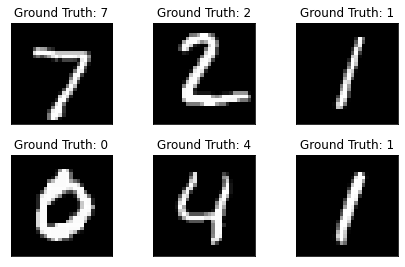

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

# 4. 构建模型